In [1]:
%load_ext autoreload
%autoreload 2
from plot import *

In [2]:
results_path = "../../results/bloat-then-min-prune"
show=True

In [3]:

save_path = os.path.join(results_path, "plots")
os.makedirs(os.path.join(save_path), exist_ok=True)

metrics = [
    "evals_by_batch",
    "normed_fitness_by_batch",
    "pruned_cxs",
    # "offspring_by_batch",
    # "fitness_by_batch",
    "cx_by_batch",
    "nodes_by_batch",

]
results = read_tensor_results(results_path, metrics, max_runs=None)

Merging: 100%|██████████| 2749/2749 [09:50<00:00,  4.65it/s]


In [4]:
results

,batch,condition,cx_by_batch,evals_by_batch,nodes_by_batch,normed_fitness_by_batch,pruned_cxs,run,target
0,0,bloat-then-min-prune-16-0,9.0,10.0,0.0,0.266759,0.0,run_4927355628828168686,data/skull.png
1,1,bloat-then-min-prune-16-0,9.0,166.0,0.0,0.288533,0.0,run_4927355628828168686,data/skull.png
2,2,bloat-then-min-prune-16-0,31.0,370.0,4.0,0.309089,0.0,run_4927355628828168686,data/skull.png
3,3,bloat-then-min-prune-16-0,31.0,413.0,4.0,0.309089,0.0,run_4927355628828168686,data/skull.png
4,4,bloat-then-min-prune-16-0,31.0,502.0,4.0,0.309089,0.0,run_4927355628828168686,data/skull.png
...,...,...,...,...,...,...,...,...,...
194388,222,bloat-then-min-prune-64-16,473.0,29620.0,123.0,0.484136,16.0,run_16766440513607832046,data/apple.png
194389,223,bloat-then-min-prune-64-16,473.0,29675.0,123.0,0.484136,16.0,run_16766440513607832046,data/apple.png
194390,224,bloat-then-min-prune-64-16,473.0,29830.0,123.0,0.484136,16.0,run_16766440513607832046,data/apple.png
194391,225,bloat-then-min-prune-64-16,473.0,29916.0,123.0,0.484136,16.0,run_16766440513607832046,data/apple.png


In [5]:
print(results[results['evals_by_batch']> 49_000].run.unique())

[]


In [6]:
for target in results.target.unique():
    print(target)
    for cond in results.condition.unique():
        print("\t", cond, end='\t\t')
        # count runs with target
        print(results[(results.target==target ) & (results.condition==cond)].run.unique().shape)

data/skull.png
	 bloat-then-min-prune-16-0		(20,)
	 bloat-then-min-prune-64-64		(20,)
	 bloat-then-min-prune-16-16		(20,)
	 bloat-then-min-prune-64-63		(20,)
	 bloat-then-min-prune-1-0		(20,)
	 bloat-then-min-prune-64-0		(15,)
	 bloat-then-min-prune-64-16		(20,)
data/dolphin.png
	 bloat-then-min-prune-16-0		(20,)
	 bloat-then-min-prune-64-64		(20,)
	 bloat-then-min-prune-16-16		(20,)
	 bloat-then-min-prune-64-63		(20,)
	 bloat-then-min-prune-1-0		(20,)
	 bloat-then-min-prune-64-0		(18,)
	 bloat-then-min-prune-64-16		(20,)
data/sunrise.png
	 bloat-then-min-prune-16-0		(20,)
	 bloat-then-min-prune-64-64		(20,)
	 bloat-then-min-prune-16-16		(20,)
	 bloat-then-min-prune-64-63		(20,)
	 bloat-then-min-prune-1-0		(20,)
	 bloat-then-min-prune-64-0		(18,)
	 bloat-then-min-prune-64-16		(20,)
data/apple.png
	 bloat-then-min-prune-16-0		(23,)
	 bloat-then-min-prune-64-64		(20,)
	 bloat-then-min-prune-16-16		(20,)
	 bloat-then-min-prune-64-63		(20,)
	 bloat-then-min-prune-1-0		(20,)
	 bloat-then-mi

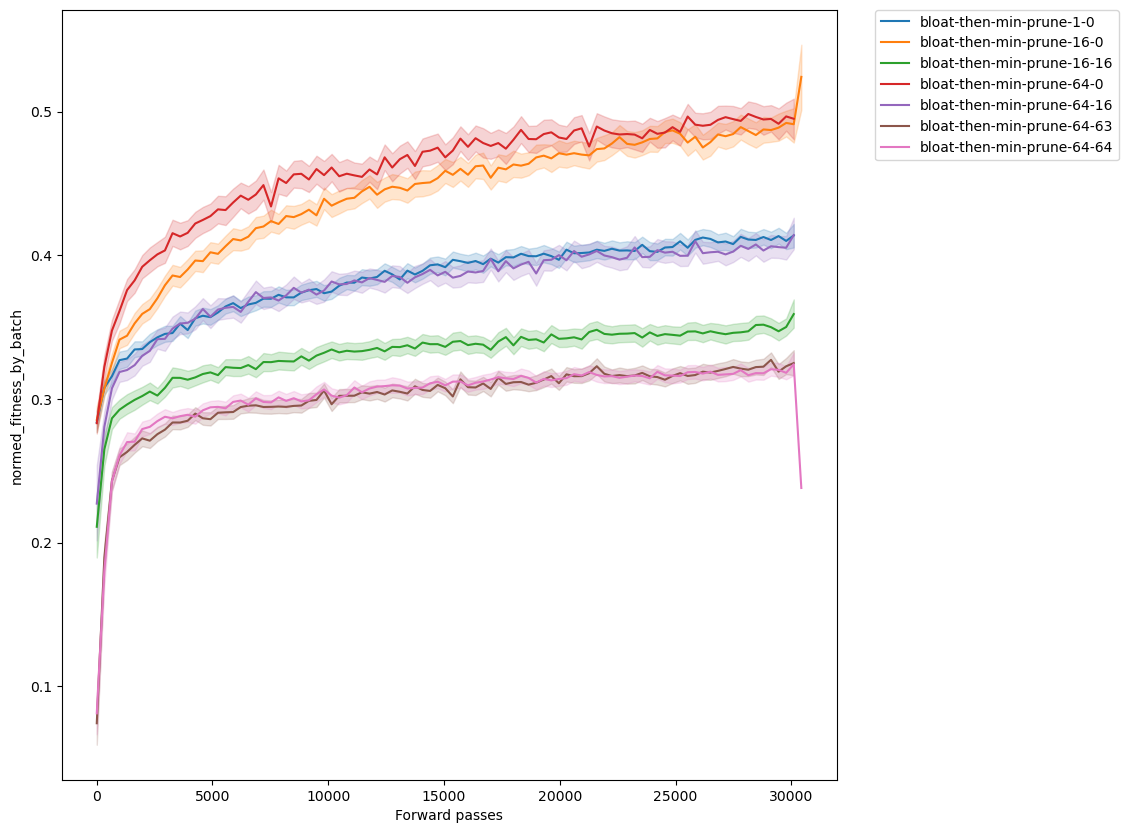

In [7]:
# plot_vs_evals(results, 'normed_fitness_by_batch', save_path, show)
plot_vs_evals(results, 'normed_fitness_by_batch', save_path, show, mean_by_target=True, smooth=.90)

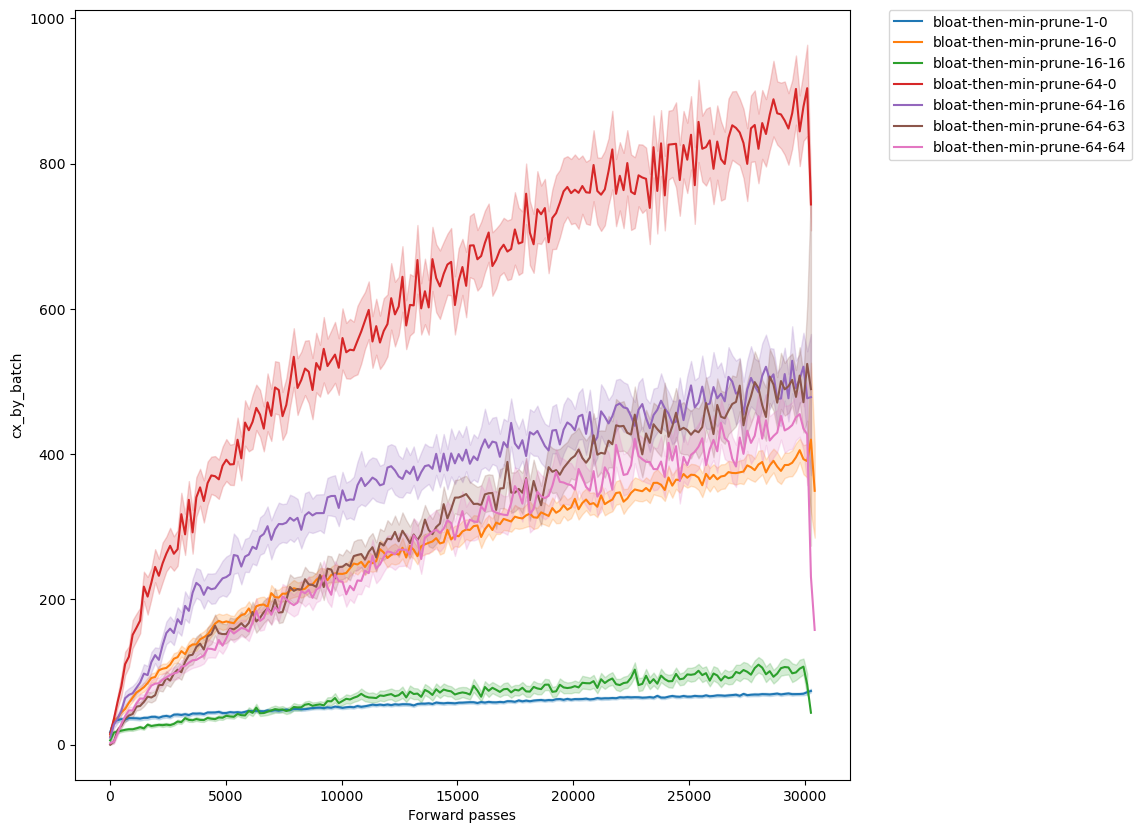

In [8]:
# plot_vs_evals(results, 'cx_by_batch', save_path, show)
plot_vs_evals(results, 'cx_by_batch', save_path, show, mean_by_target=True, smooth=0.8)

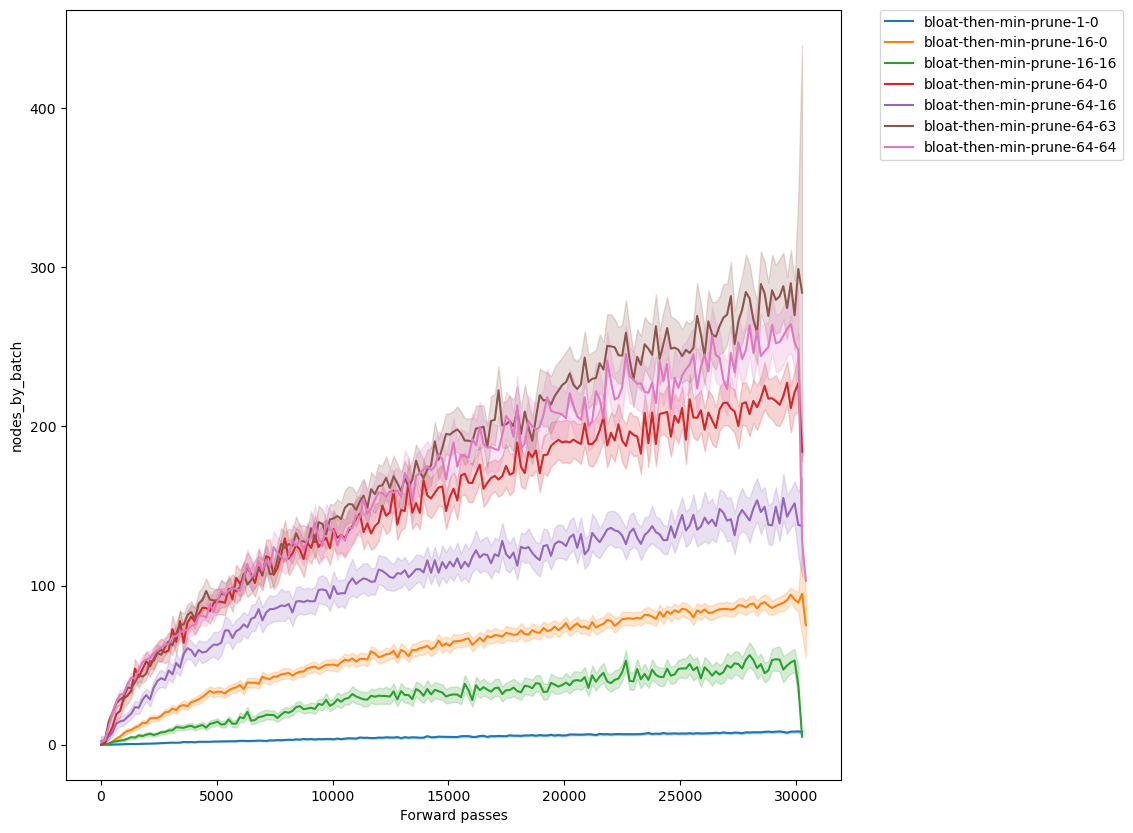

In [9]:
# plot_vs_evals(results, 'nodes_by_batch', save_path, show)
plot_vs_evals(results, 'nodes_by_batch', save_path, show, mean_by_target=True, smooth=0.8)

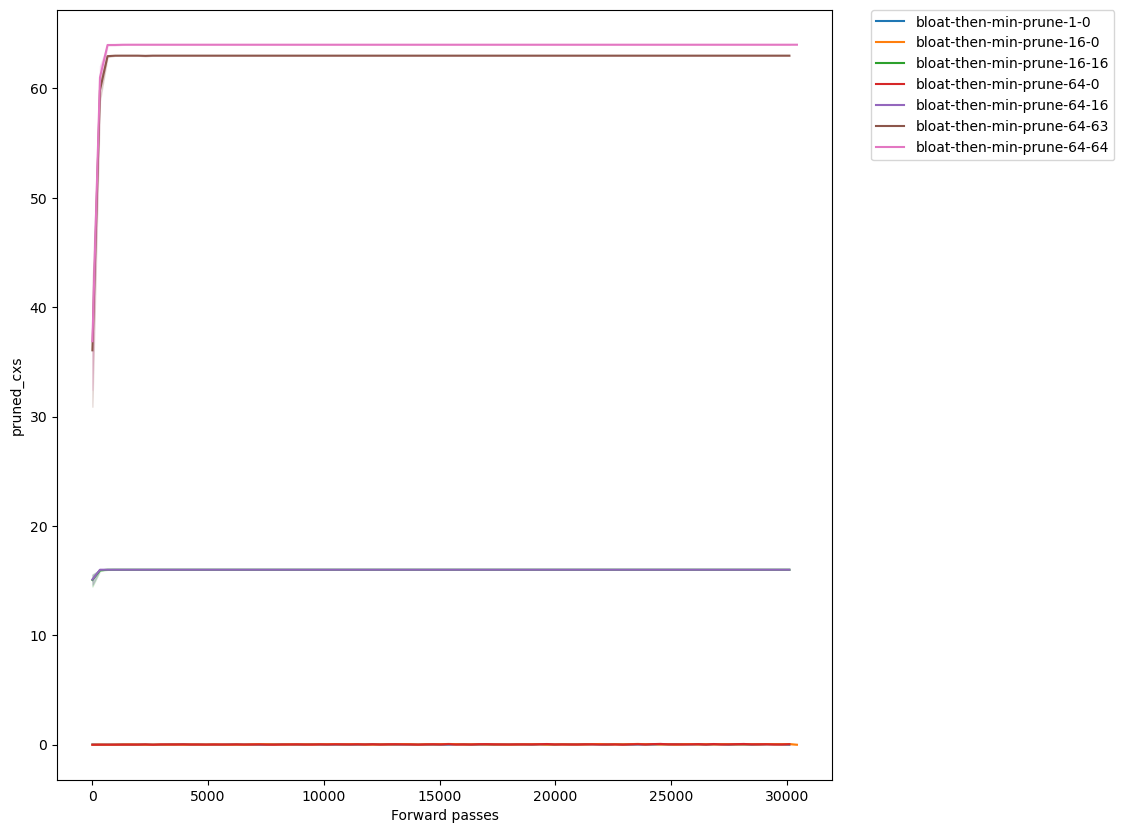

In [10]:
# plot_vs_evals(results, 'pruned_cxs', save_path, show)
plot_vs_evals(results, 'pruned_cxs', save_path, show, mean_by_target=True, smooth=0.90)